# Dose versus respons

Alle reagerer forskjellig på den samme dosen toksin. Tenk deg at klassen din har linjefest og alle får tre drikkebonger hver. Når festen er ferdig har studentene respondert forskjellig på den samme dosen toksin. Hvis det er mange nok studenter i klassen så kan vi forvente at responsen er normal-fordelt.

Det kan fremstilles på følgende måte

\begin{align}
f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^{2}}
\end{align}

I dette tilfellet er f(x) sansynligheten for en gitt respons
<br>
x er responsen 
<br>
$\sigma$ er standard avviket
<br>
$\mu$ er middelverdien

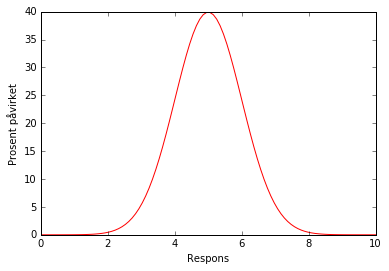

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,10,100)

mu = 5
sigma = 1

Bell_curve = 100/(sigma*np.sqrt(2*math.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

plt.plot(x,Bell_curve,'r')
plt.ylabel('Prosent påvirket')
plt.xlabel('Respons')

Standardavviket kan enkelt beregnes fra variansen.

\begin{align}
\sigma^{2}=\frac{\sum_{n=1}^{N}(x_i - \mu)^2 f(x_i) }{\sum_{n=1}^{N}f(x_i}
\end{align}

![title](Normal distribution II.JPG)

## Et eksempel

74 mennesker ble testet for hudirritasjoner knyttet til **en spesifikk dose** kjemikalie. Responsen ble målt på en skala fra 0 til 10, hvor 0 var ingen reaksjon og 10 indikerte en sterk reaksjon. Antall påvirkede personer er vist i tabellen nedenfor.

In [2]:
import pandas as pd

A = np.array([[0.0,0.0],[1.0,5.0],[2.0,10.0],[3.0,13.0],[4.0,13.0],[5.0,11.0],[6.0,9.0],[7.0,6.0],[8.0,3.0],[9.0,3.0],[10.0,2.0]])

#d = {'col1': [1, 2], 'col2': [3, 4]}
#df = pd.DataFrame(data=d)
df = pd.DataFrame(A,dtype=np.int8,columns=['Respons', 'Antall personer påvirket'])
df

,Respons,Antall personer påvirket
0,0,0
1,1,5
2,2,10
3,3,13
4,4,13
5,5,11
6,6,9
7,7,6
8,8,3
9,9,3


### Oppgaver
Plot et histogram som viser fordelingen av responsen
<bt>
Beregn middelverdien og standardavviket
<bt>
Plot en normalfordeling sammen med histogramet og de orginale dataene


middelverdien er  4.50666666667


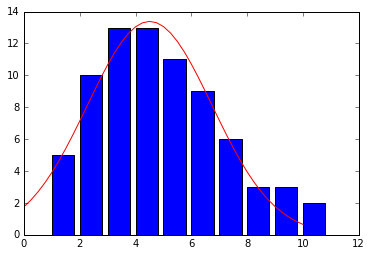

In [3]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

A = np.array([[0.0,0.0],[1.0,5.0],[2.0,10.0],[3.0,13.0],[4.0,13.0],[5.0,11.0],[6.0,9.0],[7.0,6.0],[8.0,3.0],[9.0,3.0],[10.0,2.0]])

np.mean(A[0:11,1])

mu = np.sum(A[0:11,0]*A[0:11,1])/75

print('middelverdien er ',mu)

var = np.sum((A[0:11,0]-mu)**2*A[0:11,1])/75

sigma = np.sqrt(var)
    
plt.figure(1)
plt.clf()
plt.bar(A[0:11,0],A[0:11,1])
#plt.plot(A[0:11,0],A[0:11,1],'x')

x = np.linspace(0,10,41)
Bell_curve = 75*1/(sigma*np.sqrt(2*math.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

plt.plot(x,Bell_curve,'r')

## Når dosen er forskjellig
La oss fortsette dette eksempelet med hudirritasjoner knyttet til en kjemikalietest. Denne gangen blir det testet forskjellige doser på menneskene. Noen får en stor dose og noen får en liten dose. Da kan vi forvente at det blir en stor forskjell i responsen. Samtidig vil det være en variasjon mellom de menneskene som har fått lik dose. Det blir registrert middelverdien og standardavviket for hver dose.
<bt>
En komplett dose mot respons kurve får vi nå vi plotter den kumullative responsen mot dosen. Da bruker vi dataene fra tidligere.

In [4]:
import pandas as pd
import numpy as np


dose = [0 ,1,2,3,4,5,6,7,8,9,10]

respons = np.array([0.0232,0.0519,0.0948,0.1417,0.173,0.174,0.143,0.096,0.0527,0.0237,0.00874])# dette er den forventede responsen ved en gitt dose
data = np.zeros((11,3))
data[:,0] = dose
data[:,1] = respons
data[:,2] = (respons*75)

df = pd.DataFrame(data,columns=['Respons', 'Andel personer påvirket','Antall personer påvirket'])
df


,Respons,Andel personer påvirket,Antall personer påvirket
0,0.0,0.02320,1.7400
1,1.0,0.05190,3.8925
2,2.0,0.09480,7.1100
3,3.0,0.14170,10.6275
4,4.0,0.17300,12.9750
5,5.0,0.17400,13.0500
6,6.0,0.14300,10.7250
7,7.0,0.09600,7.2000
8,8.0,0.05270,3.9525
9,9.0,0.02370,1.7775


Da kan dette plottes slik at vi kan se hvordan det ser ut. Først plottes fordelingen så plottes den kumullative fordelingen.

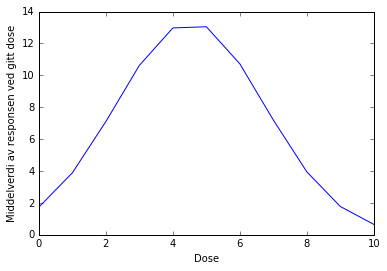

In [5]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

plt.plot(data[:,0],data[:,2])
plt.xlabel('Dose')
plt.ylabel('Middelverdi av responsen ved gitt dose')

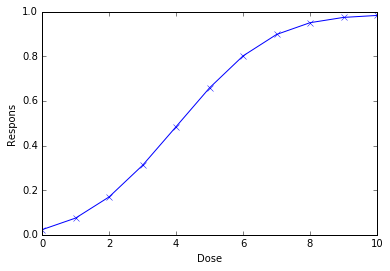

In [6]:
Kum_respons = np.cumsum(data [:,1])

plt.plot(data[:,0],Kum_respons,'-x')
plt.xlabel('Dose')
plt.ylabel('Respons')

Ved å fremstille dataene med den kumullative responsen gir god mening siden alle reagerer ved en lavere dose.
<bt>
I mange tilfeller er det bedre å fremstille dataene med en logaritmisk skala for dosen. Det gjøres nedenfor.

[       -inf  0.          0.69314718  1.09861229  1.38629436  1.60943791
  1.79175947  1.94591015  2.07944154  2.19722458  2.30258509]


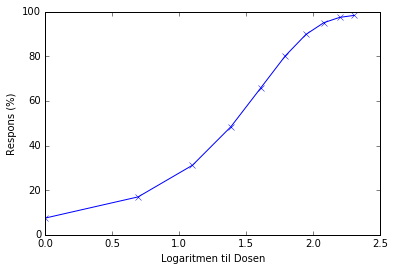

In [7]:
log_dose = np.log(dose)
print(log_dose)


plt.plot(log_dose,Kum_respons*100,'-x')
plt.xlabel('Logaritmen til Dosen')
plt.ylabel('Respons (%)')

## Avlesning av dose og respons

Nå kan vi gå inn i grafen og sjekke hvilken dose som gir en respons hos for eksempel 10% av testpersonene.
<bt>
De forskjellige andelene som responderer deles inn etter dosen. Den dosen som er "effektiv" for 50% av testpersonene kalles ED50 (effektiv dose 50%). Den dosen som er "effektiv" for 10% av testpersonene kalles ED10.
<bt>
Hvis det er snakk om dødelige doser så kalles det Lethal Dose (LD50 og LD10). Toksiske doser brukes om effekter som ikke er dødelige med som gir irreversible effekter kalles Toxic Dose (TD50 og TD10).

## Modeller for dose og respons-kurver

Ofte er data for dose og respons gitt som en lineær funksjon av en probit. En probit er en sannsynlighets-enhet (probability unit). Det er litt vrient å venne seg til å bruke probit, men med litt trening så gir det god mening.
<bt>
Probit er en transformasjon fra sannsynlighet (f(x) eller P) til en ny variable Y. Den formelle transformasjonen er gitt under. Den vises kun som bakgrunnsinformasjon, da bruken er en del enklere.

\begin{align}
P = \frac{1}{(2 \pi)^2} \int_{-\infty}^{Y-5} exp \left[ -\frac{u^2}{2} \right] du
\end{align}

For beregninger er det mye lettere å bruke en konvertering fra sansynlighet til probit ved
<bt>
\begin{align}
P = 50 \left[ 1 + erf \left( \frac{Y-5}{\sqrt{2}} \right)   \right]
\end{align}

<bt>
Vi ser at det ikke er rett frem å løse Y fra ligningen over. Da kan det være lurt å lage seg et lite program som løser saken på en enkel måte.

<bt>
I python kan vi gjøre det på følgende måte. Da definerer vi en funksjon som regner "Probability to Probit". Den får en input P og gir en utput Y. Beregningen er basert på en bisection metode. Info om dette kan du finne i en vanlig matematikkbok, eller se på https://en.wikipedia.org/wiki/Bisection_method (selv om Wikipedia referanser kan være upålitelige).

### Sansynlighet til probit

In [8]:
def Prob2Probit(P):
    """
    Denne funksjonen beregner probitverdien som korresponderer med en gitt
    sansynlighet
    """
    
    def Prob0(Y,P) :
        """
        Denne funksjonen brukes til å regne ut probitverdien i funksjonen nedenfor
        """
        import numpy as np
        import math
        
        Pcalc = 50.0*(1 + math.erf((Y-5)/np.sqrt(2)) ) - P
        return Pcalc    
    
    a, b = 0, 9
    app = 0.001
    Fa, Fb = Prob0(a,P), Prob0(b,P)
    if Fa * Fb > 0:
     raise Exception('No change of sign - bisection not possible')   
    while( b - a > app ): 
     x = ( a + b ) / 2.0
     f = Prob0(x,P)
     if f * Fa > 0: a = x
     else: b = x  

    return x

Da kan vi gå inn og se hva probitverdien (Y) blir forskjellige sannsynligheter (P). La oss først prøve med en 20% sannsynlighet (P=20). Og videre kan vi teste med forskjellige sansynligheter.

In [11]:
Y = Prob2Probit(20)
Y

4.15887451171875

### Probit til sansynlighet
På lik måte så lager vi en funksjon som regner fra probit til sansynlighet

In [12]:
def ProbitFraProb(Y) :
        """
        Denne funksjonen brukes til å regne ut probitverdien i funksjonen nedenfor
        """
        import numpy as np
        import math
        
        P = 50.0*(1 + math.erf((Y-5)/np.sqrt(2)) )
        return P   

Vi tester med å regne hva sansynligheten er når probit er Y=4.01

In [14]:
ProbitFraProb(5)

50.0

Ofte fremstilles omgjøringen av sansynlighet til probit (og motsatt) i en tabell. Tabellen er vist nedenfor. Der er sansynligheten gitt i prosent og probitverdien gitt i tabellen. Man kan selvfølgelig også interpolere på tabellen.

![title](Prosent_til_probit.gif)

<bt>
En liten forklaring på hvordan denne tabellen leses kan dere se i denne korte filmen.

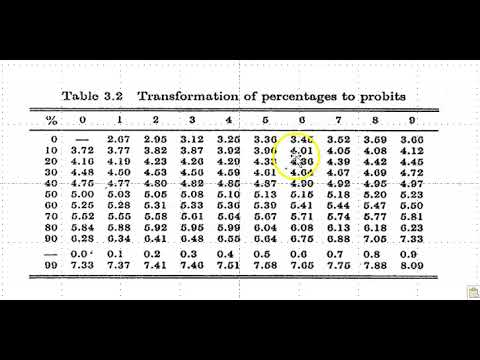

In [15]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('MG6mv6ZGZak')


## Hva skal dette brukes til?
Nå har dere lært (og repetert) en del sansynlighetsregning, men hva kan dere bruke dette til? Det skal benyttes til å beregne responsen fra en gitt dose. Nå utvider vi begrepet dose til også å innkludere trykk-last, termisk stråling fra en brann og eksponert dose av toksin.
<bt>
Den store fordelen til probit er at verdien er lineært avhengig av logaritmen til dosen. Da er det lett å beregne frem og tilbake fra dose til sansynlighet.
<bt>
Probit beregnes fra to koeffisienter og logaritmen til en dose (V).

\begin{align}
Y = k_1 + k_2 ln( V)
\end{align}

<bt>
Vi lager oss en funksjon som beregner probit og sansynlighet

In [16]:
def Probit2Prob(k1,k2,V):
    """
    Denne funksjonen beregner sansynlighet basert på gitte probitparametere 
    k1 og k2 samt dosen V. Pass på å bruke riktig enhet på dosen.
    """

    import numpy as np
    import math

    Y = k1 + k2 *np.log(V);
    
    P = 50.0*(1 + math.erf((Y-5)/np.sqrt(2)) )

    return P

<bt>
Du må være nøye når du evaluerer dosen. Den er ofte gitt som en kombinasjon av flere variable. Koeffisientene og dosens enhet finner vi i tabeller. En tabell er gitt i Crowl og Louvar og er vist nedenfor.

![title](Probit_input.png)
<bt>
Vi ser fra tabellen at dosen (causative variable) er forskjellig. Derfor er det viktig å benytte riktig dose i beregningene. For eksempel er probit verdien for knust glass gitt ved

\begin{align}
Y = -23.8 + 2.92 * ln(P)
\end{align}

Her må dosen (trykket) være gitt med enhet Newton per kvadratmeter, ellers kjent som Pascal.
<bt>
Hvis vi ønsker å få litt erfaring med hva disse tallene betyr så kan det være greit å plotte det slik at vi kan få en følelse med størrelsen på dosen (trykket)

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

k1 = -23.8
k2 = 2.92

V = 101325*0.2

P = Probit2Prob(k1,k2,V)

print('Sansynligheten for at glasset knuser er', np.round(P,2),'%')

Sansynligheten for at glasset knuser er 56.22 %


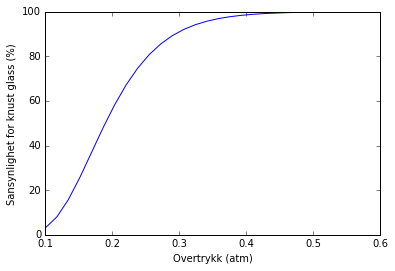

In [18]:
x = np.linspace(0.1,0.6,30)

V = 101325*x
#print(V)
P = np.zeros(len(V))

for i in range(0,30):
    P[i] = Probit2Prob(k1,k2,V[i])
     
plt.figure(1)
plt.clf()
#plt.plot(T[for_end,:].T)
plt.plot(x,P)
#plt.ylim(ymax=220)
#plt.xlim(xmax=n+1)
#plt.show()
plt.ylabel('Sansynlighet for knust glass (%)')
plt.xlabel('Overtrykk (atm)')

## Om probit doser

Som sagt er det viktig å holde rede på dosene når vi jobber med probit
<bt>

### Brann
Dosen som ofte benyttes når vi beregner skader fra brann er knyttet til en strålingstid. Dette er gitt ved:

\begin{align}
V = \frac{t I^{4/3}}{10^4}
\end{align}

fra dette er tiden **t** avhengig av hvilket tilfelle vi undersøker. Er det en vedvarende brann så brukes eksponeringstiden, det vi si hvor lenge man er eksponert for den termiske strålingen. Evaluerer vi effekten fra en ildkule eller en kortvarig brann så må vi bruke en effektiv tid. Denne må vi ofte anslå eller finne måter å beregne den på.
Intensiteten **I** må også evalueres på bakgrunn av hvilken type brann man evaluerer.

### Eksplosjoner
Dosen som benyttes for å evaluere effektene fra eksplosjoner varierer. Noen benytter overtrykket gitt i Pascal $\left( \frac{N}{m^2} \right)$.
<bt>
Beregnigner av sansynlighet for skade og død på grunn av at man blir truffet av trykkbølger eller blir truffet av fragmenter benytter impulse som dose. Pass på at dette er den formelle definisjonen av impuls. Det er definert som tids-integralet av en kraft. Altså det som gir en endring i massefart. Vi benytter det på en enkel måte.

\begin{align}
J = \int P dt \approx P t
\end{align}
<bt>
Hvor **t** er varigheten og trykket er konstant.

### Giftige stoffer
Når vi beregner sansynligheten for død på grunn av eksponering for giftige stoffer er det viktig at dosen tar høyde for konsentrasjonen av giftig stoff og eksponeringstiden. Da blir dosen gitt ved å integrere konsentrasjonen over tid.

\begin{align}
V = \int_{0}^{t} C^n dt
\end{align}
<bt>
Her er tiden **t** gitt i minutter og konsentrasjonen gitt i ppm (parts per million). Man kan regne om fra $\frac{mg}{m^3}$ til ppm ved formelen

\begin{align}
C_{ppm} = \frac{22.4}{M [g/mol]}\frac{T [K]}{273}\frac{1}{P [atm]}C_{mg/m^3}
\end{align}